 # GB Accidents 2005-2015 Database. Case of study.
 This case of study is an opportunity to learn and see how every day data science tasks are performed while learning interesting key points about GB's road accidents between 2005 and 2015. Nevertheless, it's important to note that any conclussions drawn here are preliminary and subject to peer review.

 The main dataset can be downloaded following this link 'https://data.gov.uk/dataset/c0eec478-ef19-4234-826f-8efb9563eda2/road-safety'. Here you'll find four files. Accidents, Casualties, Vehicles and a key. We'll also make use of traffic estimates for the whole of GB. This data can be found here 'https://www.gov.uk/government/collections/road-traffic-statistics'

 In this notebook any comments on the data or results we'll be made in the markdown. Any comments on the code we'll be made as a code comment.


In [3]:
# Import necessary packages
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy.stats import poisson
sns.set()

In [4]:
# Using read_csv from pandas we read the datasets that will be subject of study. Note that specifying the columns names in usecols became paramount as some of the lines in the files had an extra column, disarranging the shape of the tables.

df_accidents = pd.read_csv("..\\Data/Accidents0515.csv", sep=',', header=0)

df_cassualties = pd.read_csv("..\\Data/Casualties0515.csv", sep=',', header=0,
                             usecols=['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
                                      'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
                                      'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
                                      'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
                                      'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
                                      'Casualty_Home_Area_Type'])

df_vehicles = pd.read_csv("..\\Data/Vehicles0515.csv", sep=',', header=0,
                          usecols=['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
                                   'Towing_and_Articulation', 'Vehicle_Manoeuvre',
                                   'Vehicle_Location-Restricted_Lane', 'Junction_Location',
                                   'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
                                   'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
                                   '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
                                   'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
                                   'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
                                   'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type'])

Road_traffic_GB = pd.read_csv("..\\Data/tra0201.csv", sep=',', header=6, skipfooter=12)

c:\Users\victor.sequi\OneDrive - AECOM Directory\Projects-UKBDF1LT47680\Personal\DS\GB-Accidents---Case-of-Study\Scripts\Exploring the data.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_cassualties = pd.read_csv("Data/Casualties0515.csv", sep=',', header=0,


 Now that we've read the data, it's important to get a feel of what we are dealing with.
 What does the dataset look like? What columns does it contain? What dtypes are the columns?
 How many rows does it have? Without going into exhausting text explanation,
 the cell below shows the first 5 rows of the main dataset (Accidents0515.csv).
 It also lists the columns the dataset contains, along with the data type of these.

In [5]:
# display the first 5 rows of the df_accidents dataframe and display the info
display(df_accidents.head())
display(df_accidents.info())

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
Accident_Index                                 object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                   int64
Accident_Severity                              int64
Number_of_Vehicles                             int64
Number_of_Casualties                           int64
Date                                           object
Day_of_Week                                    int64
Time                                           object
Local_Authority_(District)                     int64
Local_Authority_(Highway)                      object
1st_Road_Class                                 int64
1st_Road_Number                                int64
Road_Type                  

None

 It looks like some of the data hasn't been read in the most convenient way.
 For example, the Date and Time have been read as objects.
 The 'to_datetime' function from pandas converts the objects into datetime format.
 This can be a memory expensive operation.

In [6]:
# Concatenate the Date and Time string columns and process them with 'to_datetime'
df_accidents.Date = pd.to_datetime(
    df_accidents.Date.str.cat(df_accidents.Time, sep=' '))
display(df_accidents.Date.head())

0   2005-04-01 17:42:00
1   2005-05-01 17:36:00
2   2005-06-01 00:15:00
3   2005-07-01 10:35:00
4   2005-10-01 21:13:00
Name: Date, dtype: datetime64[ns]

 Whenever a dataset is used it's necessary to understand how many null values (or NA) there are and design a way to deal with them which can be ignoring them or filling them in. The cell below shows that there aren't many null values for any of the data columns except for LSOA_of_Accident_Location and even in that case they only represent just over 7%. However, looking at the specifications of the dataset it can be seen that, for example, Weather_conditions equal 9 is tipified as "unkown wheather conditions" which is another way of saying that we have a missing value in that instance.

In [7]:
# Count the number of null (NA) instances in df_accidents
display(df_accidents.isnull().sum())

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                              151
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

 # Accidents and their characteristics

 The number of accidents for each severity category observed over the 5 year period can be counted to form a table. It can be seen that the overwhelming majority are slight accidents, a few of them are serious, and very few are fatal.

In [8]:
# Count the instances recorded for each Accident_Severity, normalise it to obtain the percentage break down.
display(pd.DataFrame(df_accidents.Accident_Severity.value_counts()).set_index(pd.Index(['Slight', 'Serious', 'Fatal'])))
display(pd.DataFrame(df_accidents.Accident_Severity.value_counts(normalize=True)).set_index(pd.Index(['Slight', 'Serious', 'Fatal'])))

,Accident_Severity
Slight,1515575
Serious,242080
Fatal,22998


,Accident_Severity
Slight,0.851134
Serious,0.135950
Fatal,0.012915


 It's also interesting to see what distribution the different severities follow when broken down by day of the week (0 for Monday, 6 for Sunday), month and year.

 Although the distributions by accident severity show a similar tendency, they are not completely parallel. When looking at the severity breakdown by day of the week, we can see that the peak for fatal is Saturday, whilst for the other two is Friday.

 When it comes to the distributions by month, it's better to be a bit cautious about jumping into any conclussions.
 February is for the three severity categories the "safest" month, but it's also the shortest month and correction factors haven't been inroduced to account for that.

 The severity distributions by year show a clear decent with time for all severity categories.

Date,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Accident_Severity,,,,,,,
1,3060,3090,3055,3081,3448,3786,3476
2,33671,33990,34502,34600,37260,35279,32750
3,218434,222935,225567,224805,236769,206147,180797


Date,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Accident_Severity,,,,,,,,,,,,
1,1992,1700,1777,1808,1950,1906,2006,1961,1905,2060,1942,1989
2,19898,17345,19246,19622,21001,20853,21545,20565,21429,21334,20747,18467
3,129974,111984,122281,121600,128738,127841,130570,126113,129409,133369,134430,119145


Date,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Accident_Severity,,,,,,,,,,,
1,2913,2926,2714,2341,2057,1731,1797,1637,1607,1658,1615
2,25025,24945,24319,23117,21995,20440,20982,20898,19621,20676,20034
3,170768,161272,155062,145117,139485,132235,128683,123031,117424,123988,118389


[Text(0, 0.5, 'Slight'), Text(0.5, 0, 'Year')]

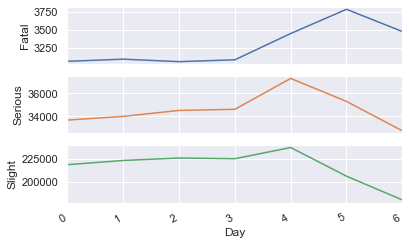

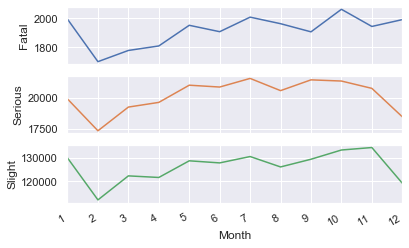

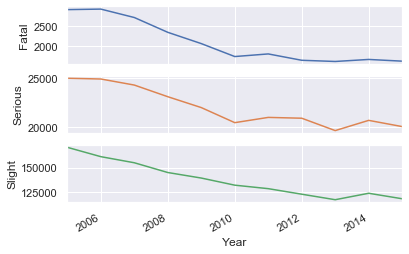

In [9]:
# Perform cross tabulations of Accident_Severity against day of the week, month and year. Plot them.

df_accidents_weekday = pd.crosstab(df_accidents.Accident_Severity, df_accidents.Date.dt.weekday)
df_accidents_month = pd.crosstab(df_accidents.Accident_Severity, df_accidents.Date.dt.month)
df_accidents_year = pd.crosstab(df_accidents.Accident_Severity, df_accidents.Date.dt.year)

display(df_accidents_weekday)
display(df_accidents_month)
display(df_accidents_year)

axes = df_accidents_weekday.transpose().plot(
                                      kind='line', subplots=True, legend=False)
axes[0].set(ylabel='Fatal')
axes[1].set(ylabel='Serious')
axes[2].set(xlabel='Day', ylabel='Slight')

axes = df_accidents_month.transpose().plot(kind='line', subplots=True,
                                           xticks=df_accidents_month.columns, legend=False)
axes[0].set(ylabel='Fatal')
axes[1].set(ylabel='Serious')
axes[2].set(xlabel='Month', ylabel='Slight')

axes = df_accidents_year.transpose().plot(
    kind='line', subplots=True, legend=False)
axes[0].set(ylabel='Fatal')
axes[1].set(ylabel='Serious')
axes[2].set(xlabel='Year', ylabel='Slight')

 # Statistical inference
 Can we statistically say that 2015 was safer than in 2005?

 To test this, a Poisson distribution with a lambda equals to the number of
 accidents observed in 2005 was used to produce a random sample of
 accidents that occur.
 Using that distribution, the probability of obtaining a number of
 accidents equal or lower than that observed in 2015 was calculated.

 Note that the traffic levels need to be taken into account for a like-for-like comparison.

In [10]:
# Pull out the traffic data for each year
traffic_year1 = Road_traffic_GB.loc[Road_traffic_GB['Year'] == 2005, 'All motor vehicles'].iloc[0]
traffic_year2 = Road_traffic_GB.loc[Road_traffic_GB['Year'] == 2015, 'All motor vehicles'].iloc[0]

# Pull out the accident data by severity
fatalities_year1 = df_accidents_year.loc[1, 2005]
fatalities_year2 = df_accidents_year.loc[1, 2015]
serious_year1 = df_accidents_year.loc[2, 2005]
serious_year2 = df_accidents_year.loc[2, 2015]
slight_year1 = df_accidents_year.loc[3, 2005]
slight_year2 = df_accidents_year.loc[3, 2015]

# Produce a random sample of a Posisson distribution with lambda equeals to the number of fatalities in year 2005
replicate = np.random.poisson(fatalities_year1, size=100000)

# Calculate the probability of obtaining a number of fatalities lower than those occurred in the 2015 using the sample calculated above.
prob = len(replicate[replicate <= fatalities_year2 * traffic_year1 / traffic_year2]) / 100000
print('If ', fatalities_year2 * traffic_year1 / traffic_year2, ' is the number of fatalities in 2015 corrected to 2005 traffic levels, the probability of getting a number of fatalities in 2005 below ',
      fatalities_year2 * traffic_year1 / traffic_year2, ' is ', prob)

replicate = np.random.poisson(serious_year1, size=100000)
prob = len(replicate[replicate <= serious_year2 * traffic_year1 / traffic_year2]) / 100000
print('If ', serious_year2 * traffic_year1 / traffic_year2, ' is the number of serious casualties in 2015 corrected to 2005 traffic levels, the probability of getting a number of serious casualties in 2005 below ',
      serious_year2 * traffic_year1 / traffic_year2, ' is ', prob)

replicate = np.random.poisson(slight_year1, size=100000)
prob = len(replicate[replicate <= slight_year2 * traffic_year1 / traffic_year2]) / 100000
print('If ', slight_year2 * traffic_year1 / traffic_year2, ' is the number of slight casualties in 2015 corrected to 2005 traffic levels, the probability of getting a number of accidents in 2005 below ',
      slight_year2 * traffic_year1 / traffic_year2, ' is ', prob)

If  1564.9372179713557  is the number of fatalities in 2015 corrected to 2005 traffic levels, the probability of getting a number of fatalities in 2005 below  1564.9372179713557  is  0.0
If  19412.973513831665  is the number of serious casualties in 2015 corrected to 2005 traffic levels, the probability of getting a number of serious casualties in 2005 below  19412.973513831665  is  0.0
If  114719.10359034725  is the number of slight casualties in 2015 corrected to 2005 traffic levels, the probability of getting a number of accidents in 2005 below  114719.10359034725  is  0.0


 We can say with a high level of statistical confidence that the number of accidents for all severities has been reduced.

 The next question we may ask ourselves is, whether Mondays are less fatal than other days of the week?
 To find out we proceed in a similar manner to what was done to compare 2015 to 2005

In [11]:
fatalities_Mondays = df_accidents_weekday.loc[1, 0]
fatalities_Saturdays = df_accidents_weekday.loc[1, 5]
fatalities_Fridays = df_accidents_weekday.loc[1, 4]
fatalities_Thursdays = df_accidents_weekday.loc[1, 3]

replicate = np.random.poisson(fatalities_Saturdays, size=100000)
prob = len(replicate[replicate <= fatalities_Mondays]) / 100000
print('The probability of getting a number of fatalities on Saturdays below that of Mondays (', fatalities_Mondays, ') is ', prob)
replicate = np.random.poisson(fatalities_Fridays, size=100000)
prob = len(replicate[replicate <= fatalities_Mondays]) / 100000
print('The probability of getting a number of fatalities on Fridays below that of Mondays (',
      fatalities_Mondays, ') is ', prob)
replicate = np.random.poisson(fatalities_Thursdays, size=100000)
prob = len(replicate[replicate <= fatalities_Mondays]) / 100000
print('The probability of getting a number of fatalities on Thursdays below that of Mondays (',
      fatalities_Mondays, ') is ', prob)

# df_accidents_Weather = pd.crosstab(df_accidents.Accident_Severity, 
#                                    df_accidents.Weather_Conditions, normalize='columns')
# df_accidents_Weather.rename(columns={1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds',
#                                      5: 'Raining + high winds', 6: 'Snowing + high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown', -1: 'Data missing or out of range'}, inplace=True)
# df_accidents_Weather.set_index(
#     pd.Index(['Fatal', 'Serious', 'Slight']), inplace=True)
# df_accidents_Weather.transpose().plot(kind='bar', figsize=(11.7, 8.3), subplots=True, legend=False)

The probability of getting a number of fatalities on Saturdays below that of Mondays ( 3060 ) is  0.0
The probability of getting a number of fatalities on Fridays below that of Mondays ( 3060 ) is  0.0
The probability of getting a number of fatalities on Thursdays below that of Mondays ( 3060 ) is  0.35692


 Looking at the above we can confidently say that the number of fatal casualties on Mondays is lower than that of Saturdays or Fridays, but we don't have statistical evidence to say the same in the case of Thursdays.
# Characteristics of the population involved in accidents between 2005 and 2015.

 For this part of the study we'll bring along the vehicles dataset. Let's remember what data fields it contains.

In [12]:
df_vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262270 entries, 0 to 3262269
Data columns (total 22 columns):
Accident_Index                      object
Vehicle_Reference                   int64
Vehicle_Type                        int64
Towing_and_Articulation             int64
Vehicle_Manoeuvre                   int64
Vehicle_Location-Restricted_Lane    int64
Junction_Location                   int64
Skidding_and_Overturning            int64
Hit_Object_in_Carriageway           int64
Vehicle_Leaving_Carriageway         int64
Hit_Object_off_Carriageway          int64
1st_Point_of_Impact                 int64
Was_Vehicle_Left_Hand_Drive?        int64
Journey_Purpose_of_Driver           int64
Sex_of_Driver                       int64
Age_of_Driver                       int64
Age_Band_of_Driver                  int64
Engine_Capacity_(CC)                int64
Propulsion_Code                     int64
Age_of_Vehicle                      int64
Driver_IMD_Decile                   int64
Driv

In [13]:
# vehicles and accidents have a comun index that allow us to merge them and do analysis with the resulting dataset.
df_acc_veh = pd.merge(df_vehicles, df_accidents, on='Accident_Index')

 A first simple breakdown we can make is looking at accident severity by the sex of the driver. For each sex of driver category we calculate the percentage breakdown of accident severity.

 The table below shows that males tend to have more severe accidents. As always, correlation is not causation. Males maybe driving longer distances or faster.

In [14]:
Sex_of_driver = pd.crosstab(df_acc_veh.Sex_of_Driver, df_acc_veh.Accident_Severity, normalize='index')
Sex_of_driver.set_index(pd.Index(['Male', 'Female', 'Not known', 'Data missing or out of range']), inplace=True)
Sex_of_driver.rename(columns={1: 'Fatal', 2: 'Serious', 3: 'Slight'})
display(Sex_of_driver)


Accident_Severity,1,2,3
Male,0.019231,0.076923,0.903846
Female,0.015243,0.136680,0.848077
Not known,0.007555,0.099416,0.893029
Data missing or out of range,0.006644,0.115941,0.877415


 Cross tabulation was applied one more time to see the accident split by age. In some cases the driver is under age, that's because this data considers a cyclist or any other person in charge of a vehicle to be a driver.

Accident_Severity Fatal        Serious        Slight       
Sex_of_Driver      Male Female    Male Female   Male Female
Age_of_Driver                                              
1                     0      0       1      0      8      1
2                     1      0       2      0     13      8
3                     0      0       9      3     57     13
4                     2      0      29      7    181     38
5                     1      0      64     14    441     89
...                 ...    ...     ...    ...    ...    ...
96                    4      0       9      3     30     11
97                    1      2       2      0     27      7
98                    1      1       4      3     22      7
99                    1      0       0      0     13      3
100                   0      0       0      0      2      0

[100 rows x 6 columns]

Text(0, 0.5, 'Slight casualties')

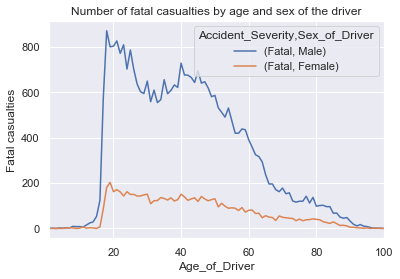

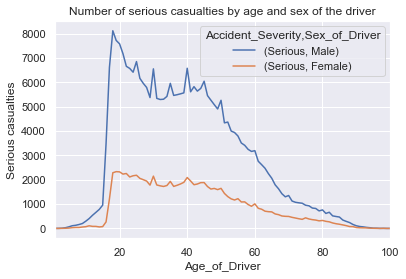

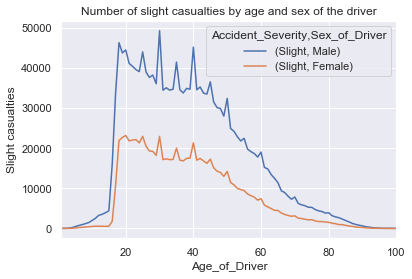

In [15]:
Age_of_Driver = pd.crosstab(df_acc_veh.Age_of_Driver, [df_acc_veh.Accident_Severity, df_acc_veh.Sex_of_Driver])
Age_of_Driver.rename(columns={1: 'Male', 2: 'Female', 3: 'Not known', -
                              1: 'Data missing or out of range'}, level=1, inplace=True)
Age_of_Driver.rename(
    columns={1: 'Fatal', 2: 'Serious', 3: 'Slight'}, level=0, inplace=True)
idx = pd.IndexSlice
display(Age_of_Driver.loc[0:, idx[:, ['Male', 'Female']]])
Age_of_Driver.loc[0:, idx['Fatal', ['Male', 'Female']]].plot(title='Number of fatal casualties by age and sex of the driver').set_ylabel('Fatal casualties')
Age_of_Driver.loc[0:, idx['Serious', ['Male', 'Female']]].plot(title='Number of serious casualties by age and sex of the driver').set_ylabel('Serious casualties')
Age_of_Driver.loc[0:, idx['Slight', ['Male', 'Female']]].plot(
    title='Number of slight casualties by age and sex of the driver').set_ylabel('Slight casualties')


 Looking at the plots above, we can see that fatal accidents not only are more numerous for males, but they are differently distributed than those of females. In the case of males the curve peaks at 18 and declines in the thirties before a second peak at 40. The females curve peakes at 19 and doesn't show the second peak at 40.
 # Correlation between number of fatalities and volumes of traffic
 Intuitively we could expect to see some correlation between the number of accidents and traffic volumes.
 The matrix below is the matrix correlation. Note that index can also be interpreted as year, with 0 corresponding to 2005 and 10 to 2015.
 There is a strong correlation between year and traffic volumes, the plot below shows that this correlation is possitive.

 The correlations between year (index) and number of accidents by severity is weak but possitive. The strongest among these is the correlation between number of fatalities and year, which comes to say that because there's more traffic there are more fatalities. However, the number of fatalities grows at a lower rate than traffic does.

In [16]:
df_accidents['Year'] = df_accidents.Date.dt.year
df_acc_vol = pd.merge(df_accidents, Road_traffic_GB, left_on='Year', right_on='Year')
ct_acc_vol = pd.crosstab(df_acc_vol['All motor vehicles'], df_acc_vol.Accident_Severity)
ct_acc_vol.reset_index(inplace=True)
ct_acc_vol.reset_index(inplace=True)
ct_acc_vol.rename(columns={'All motor vehicles': 'Total veh-km', 1: 'Fatal', 2: 'Serious', 3: 'Slight'}, inplace=True)
display(ct_acc_vol.corr())

Accident_Severity,index,Total veh-km,Fatal,Serious,Slight
Accident_Severity,,,,,
index,1.000000,0.979257,0.317220,0.305659,0.211089
Total veh-km,0.979257,1.000000,0.315292,0.308564,0.206969
Fatal,0.317220,0.315292,1.000000,0.988449,0.977985
Serious,0.305659,0.308564,0.988449,1.000000,0.974392
Slight,0.211089,0.206969,0.977985,0.974392,1.000000


 The plot below shows a matrix of scatter plots built up with the variables studied in the correlation matrix, index (year), Total veh-km, Fatal, Serious and Slight. It's a graphical way to appreciate variables correlations. The diagonal show a kernel density estimation plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DD8A114E0>,
      dtype=object)

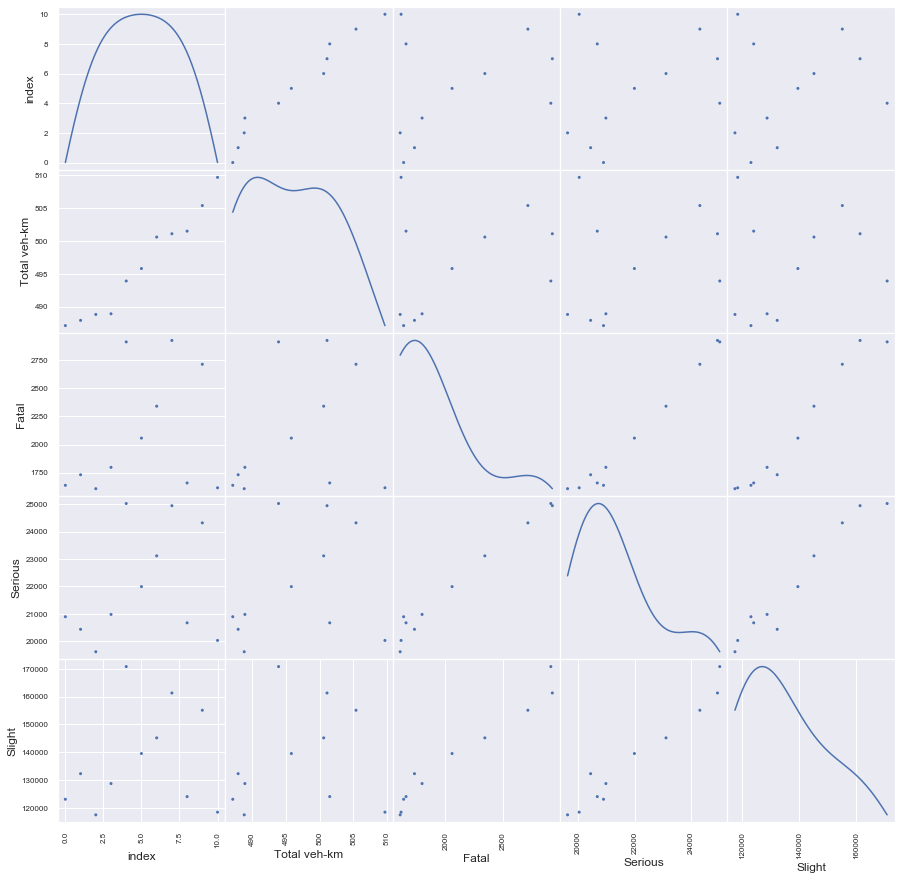

In [17]:
pd.plotting.scatter_matrix(ct_acc_vol, alpha=1, figsize=(15, 15), diagonal='kde', range_padding=0.1)


 # How do weather conditions relate to accident severity?

 Because we don't have traffic data for different wheather conditions we cannot compare the number of accidents that occur for each wheather condition with one another. But we can compare the accident severity share for days with certain wheather conditions with those of another category of wheather conditions.

 The plot below shows the percentage share of each of the weather conditions across the three accident severities. which allows us to compare accident severities between different weather conditions. It's interesting to observe that the weather type with a higher share of fatalities is "Fog or mist" followed by "Fine + high winds".

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D94419198>,
      dtype=object)

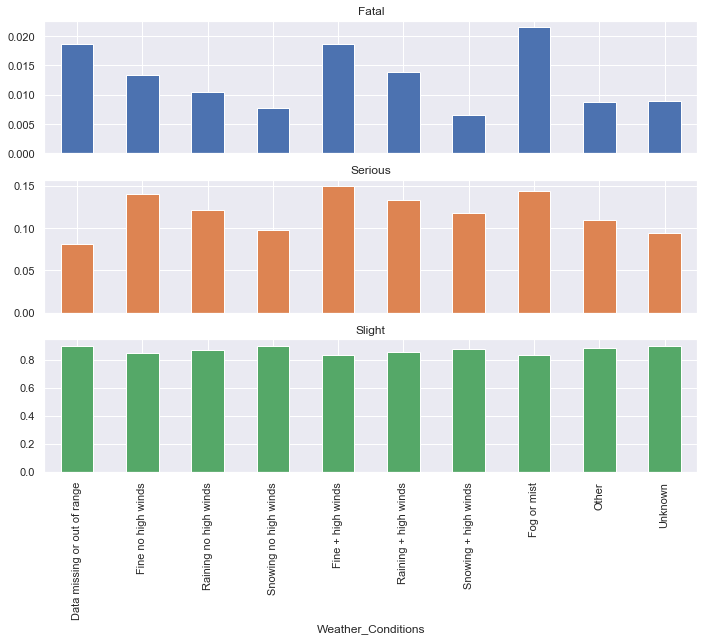

In [18]:
Weather_Conditions = pd.crosstab(df_accidents.Accident_Severity, df_accidents.Weather_Conditions, normalize='columns')
Weather_Conditions.rename(columns={1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds', 6: 'Snowing + high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown', -1: 'Data missing or out of range'}, inplace=True)
Weather_Conditions.set_index(pd.Index(['Fatal', 'Serious', 'Slight']), inplace=True)
Weather_Conditions.T.plot(kind='bar', subplots=True, figsize=(11.7, 8.3), legend=False)
